In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Got data on 10k google play store apps
https://www.kaggle.com/lava18/google-play-store-apps

In [27]:
data = pd.read_csv('googleplaystore.csv')

In [28]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [29]:
# get rid of columns that are not going to be used
data = data.drop(['Size','Content Rating','Genres','Last Updated','Current Ver','Android Ver'],1)

## Elementary analysis

In [30]:
# see all categories of apps
data.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [31]:
# average rating of all apps
data.Rating.mean()

4.193338315362448

In [32]:
data.Rating.max()
# there is a problem with the row with maximum rating (which is 19, which is impossible), so we drop this row
data = data.drop(data.Rating.idxmax())

In [33]:
data.Rating.min()

1.0

In [34]:
# count the number of free and paid apps
data.Type.value_counts()

Free    10039
Paid      800
Name: Type, dtype: int64

In [35]:
# cast number of reviews, number of installs, and price to int or float
data.Reviews = data.Reviews.astype(int)
data.Installs = data.Installs.str.replace('+','').str.replace(',','').astype(int)
data.Price = data.Price.str.replace('$','').astype(float)

#for i in range(len(data)):
#    data.Installs[i] = int(data.Installs[i][:-1].replace(',',''))
#    if (data.Price[i]=='0'):
#        data.Price[i]=0
#    else:
#        data.Price[i]=int(data.Price[i][1:])


## Groupby

In [36]:
data_category = data.groupby('Category').mean()

## Matplotlib

app category with highest average price: FINANCE


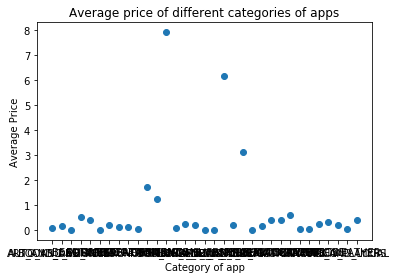

In [37]:
plt.plot(data_category.Price,'o')
plt.xlabel('Category of app')
plt.ylabel('Average Price')
plt.title('Average price of different categories of apps')
print('app category with highest average price: '+data_category.Price.idxmax())
# from the plot of average prices of each category of app, we see that several categories have very high prices, and therefore have room for profits

app category with highest average installs: COMMUNICATION


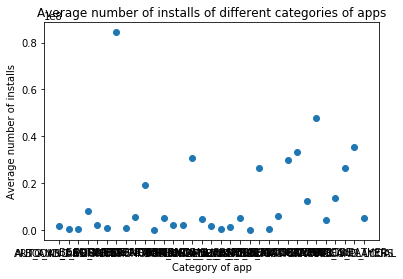

In [38]:
plt.plot(data_category.Installs,'o')
plt.xlabel('Category of app')
plt.ylabel('Average number of installs')
plt.title('Average number of installs of different categories of apps')
print('app category with highest average installs: '+data_category.Installs.idxmax())
# from the plot of average number of installs for each category of app, we can see some categories of the highest and lowest number of installs

Text(0.5, 1.0, 'Price vs Rating')

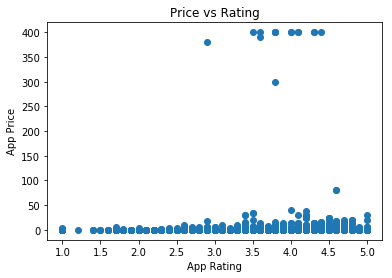

In [39]:
plt.plot(data.Rating, data.Price,'o')
plt.xlabel('App Rating')
plt.ylabel('App Price')
plt.title('Price vs Rating')
# we see that apps with higher rating tend to have higher prices

Text(0.5, 1.0, 'Number of Installs vs Rating')

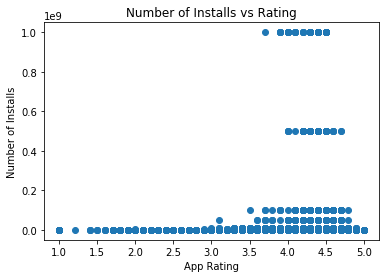

In [40]:
plt.plot(data.Rating, data.Installs,'o')
plt.xlabel('App Rating')
plt.ylabel('Number of Installs')
plt.title('Number of Installs vs Rating')
# we see apps with higher rating have higher number of installs

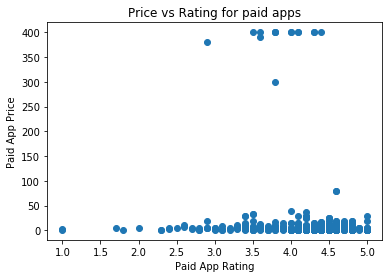

Text(0.5, 1.0, 'Installs vs Rating for paid apps')

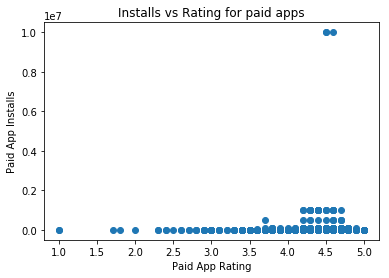

In [41]:
data_paid = data[data.Type=='Paid']
plt.plot(data_paid.Rating, data_paid.Price,'o')
plt.xlabel('Paid App Rating')
plt.ylabel('Paid App Price')
plt.title('Price vs Rating for paid apps')
plt.show()

plt.plot(data_paid.Rating, data_paid.Installs,'o')
plt.xlabel('Paid App Rating')
plt.ylabel('Paid App Installs')
plt.title('Installs vs Rating for paid apps')
# we see the same trend for paid app

## Sklearn

In [42]:
# supervised learning (use linear regression to predict the number of installs of apps)
data_paid = data_paid.dropna(0)
X = data_paid.drop(['Installs','App','Category','Type'],1)
y = data_paid.Installs
#data_new = data.dropna()
#X = data_new.drop(['Installs','App','Category','Type'],1)
#y = data_new.Installs
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [44]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [45]:
preds = reg.predict(X_test)

In [46]:
reg.score(X_train,y_train)

0.6533033199981912

In [47]:
reg.score(X_test,y_test)

0.9432100431255411

## github repo
https://github.com/ChenyuHeidiZhang/PythonDataScienceProject.git